# APPL-Stock-Prices-Analysis



   This program uses artificial recurrent neural network called Long Short Term Memory (LSTM)
to predict the closing stock price of a corporation (Apple Inc.) using the past 60 days stock price

In [1]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
# Get the stock quote
df = web.DataReader('AAPL',data_source='yahoo', start='2012-01-01',end='2020-07-10')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-07-06,375.779999,369.869995,370.000000,373.850006,29663900.0,373.850006
2020-07-07,378.619995,372.230011,375.410004,372.690002,28106100.0,372.690002
2020-07-08,381.500000,376.359985,376.720001,381.369995,29273000.0,381.369995


In [3]:
#Get the number of rows and columns in the data set
df.shape

(2144, 6)

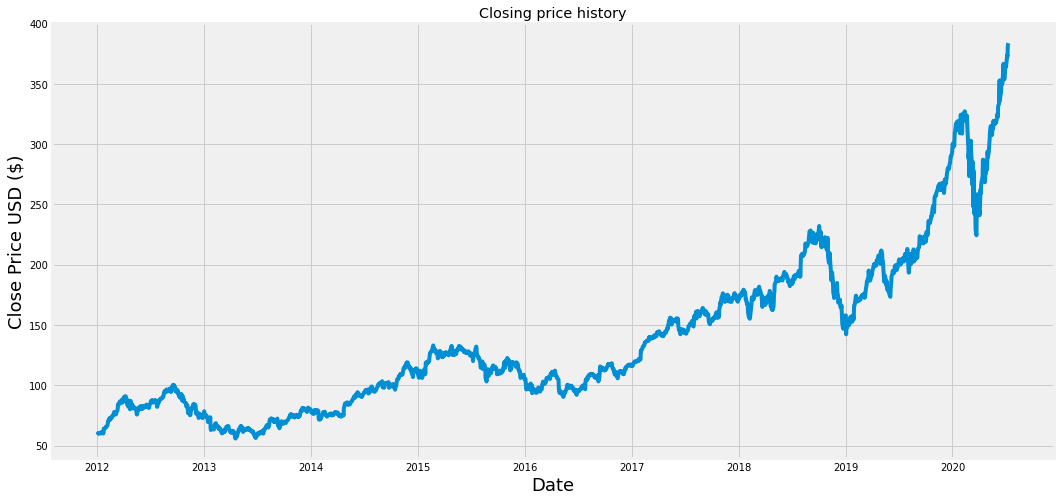

In [4]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
# Create a new dataframe with only close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset)*.8)
training_data_len 

1716

In [6]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0090187 ],
       [0.00998157],
       [0.01198137],
       ...,
       [0.99295496],
       [0.99795668],
       [1.        ]])

In [7]:
# Create the training data set
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.0090187 , 0.00998157, 0.01198137, 0.01388532, 0.01359341,
       0.01425129, 0.01395067, 0.01344527, 0.01275689, 0.01488739,
       0.01680877, 0.01621624, 0.01297038, 0.0160681 , 0.0130183 ,
       0.02445506, 0.02357062, 0.02472519, 0.02722167, 0.02873349,
       0.02860715, 0.02814097, 0.0301277 , 0.03199678, 0.03411423,
       0.03753437, 0.04471883, 0.04482775, 0.04882736, 0.05181615,
       0.04667941, 0.04865743, 0.04861822, 0.05416451, 0.05337591,
       0.05483545, 0.05745828, 0.05891785, 0.06312222, 0.0661851 ,
       0.06706952, 0.06737887, 0.06214193, 0.06087842, 0.06106578,
       0.06598902, 0.06737452, 0.07035024, 0.07736479, 0.08672334,
       0.08497187, 0.08497623, 0.09174244, 0.09385987, 0.09235239,
       0.09097564, 0.08954223, 0.09430427, 0.09757193, 0.09893998])]
[0.09555904727802514]

[array([0.0090187 , 0.00998157, 0.01198137, 0.01388532, 0.01359341,
       0.01425129, 0.01395067, 0.01344527, 0.01275689, 0.01488739,
       0.01680877, 0.01621624, 0.01

In [8]:
# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)

In [9]:
# Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1656, 60, 1)

In [10]:
# Built the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [12]:
# Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

Epoch 1/1
1656/1656 [==============================] - 63s 38ms/step - loss: 4.4948e-04


In [13]:
#Create the testing dataset
#Create a new array containing scaled values from index 1656 to 2144
test_data = scaled_data[training_data_len - 60: , :]
#Create a data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [14]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [15]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [16]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions =scaler.inverse_transform(predictions)

In [17]:
#Get the root mean square error (RMSE)
rmse = np.sqrt( np.mean((( predictions - y_test)**2)))
rmse 

10.682035880644799

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


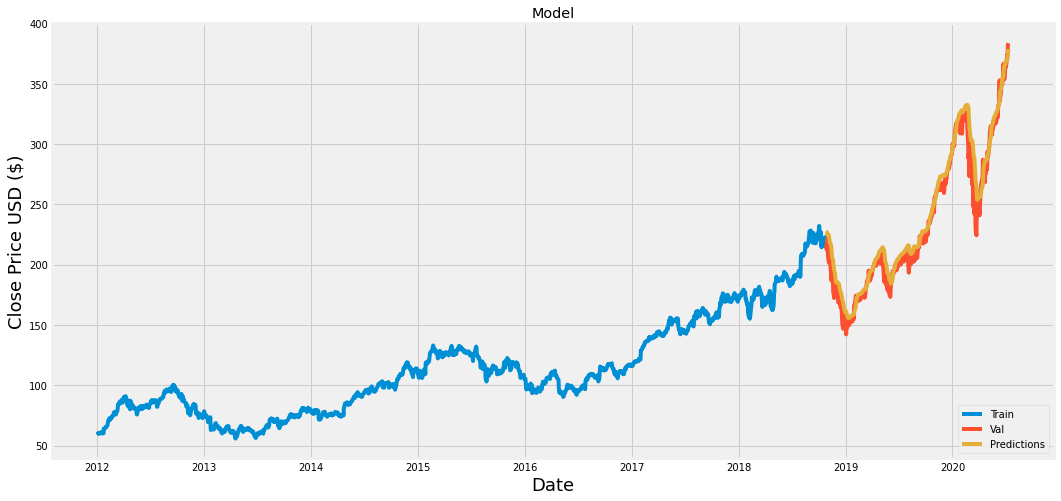

In [18]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [19]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-10-26,216.300003,227.512390
2018-10-29,212.240005,227.087723
2018-10-30,213.300003,226.149719
2018-10-31,218.860001,225.164948
2018-11-01,222.220001,224.847656
...,...,...
2020-07-06,373.850006,369.893860
2020-07-07,372.690002,371.656616
2020-07-08,381.369995,373.491669


In [20]:
# Get the quote
apple_quote = web.DataReader('AAPL',data_source='yahoo', start='2012-01-01', end='2020-07-10')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the x_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price= scaler.inverse_transform(pred_price)
print(pred_price)

[[381.56912]]


In [21]:
# Get the quote
apple_quote2 = web.DataReader('AAPL',data_source='yahoo', start='2020-07-10', end='2020-07-10')
print(apple_quote2['Close'])

Date
2020-07-10    383.679993
Name: Close, dtype: float64
